In [ ]:
#Importing Library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
scaler = StandardScaler()

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Define unnecessary columns of data <br>
Needed to choose what features will be used for correlation check and further augmentation

In [ ]:
unnes_column = []
#for i in range(78,-1,-1):
#  unnes_column.append(i)
#for i in range(14):
#  unnes_column.remove(i)
#print(unnes_column)

Function to rename columns

In [ ]:
def rename_col_by_index(dataframe, index_mapping):
    dataframe.columns = [index_mapping.get(i, col) for i, col in enumerate(dataframe.columns)]
    return dataframe

#Import real data
Dataset is chosen here. All unnecessary features removed to find better correlation. <br>
All features renamed to have unified

In [ ]:
#importing real data
#df_r=pd.read_csv('/content/drive/MyDrive/Dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df_r=pd.read_csv('/content/drive/MyDrive/Dataset/synGANSRU.csv')
for i in range(len(unnes_column)):
  removed_column = unnes_column[i]
  df_r= df_r.drop(df_r.columns[removed_column], axis=1)

df_r.head(3)

,Unnamed: 0,p1,p2,p3,p4,p5,p6,p7
0,0,0.489561,0.863193,0.312659,0.451088,0.495995,0.051849,0.194638
1,1,0.617674,0.757610,0.598061,0.748744,0.524433,0.020191,0.131597
2,2,0.848062,0.765081,0.316372,0.723072,0.510009,0.039709,0.210987


In [ ]:
#normalized_df = (df_r - df_r.min())/(df_r.max() - df_r.min())
#for i in range(len(normalized_df.axes[1])):
#  new_id = 'p'+str((i+1))
#  new_column_mapping = {i: new_id}
#  df_r = rename_col_by_index(normalized_df, new_column_mapping)
#print(unnes_column)
#normalized_df.head(3)


process dataset to have better plot

In [ ]:
for i in range(len(df_r.axes[1])):
  new_id = 'p'+str((i+1))
  new_column_mapping = {i: new_id}
  df_r = rename_col_by_index(df_r, new_column_mapping)
print(unnes_column)
df_r.head(3)

[]


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p70,p71,p72,p73,p74,p75,p76,p77,p78,p79
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


#Highly correlated features for real data
What is p1, p2?

In [ ]:
HC_r=df_r[['p13','p42' ]]
HC_r=HC_r.head(n=1000)

In [ ]:
##Standarizing real data
scaler.fit(HC_r) #Real
HC_r_array=scaler.transform(HC_r)
HC_r_array.shape #Real

(1000, 2)

<Axes: xlabel='p13', ylabel='p42'>

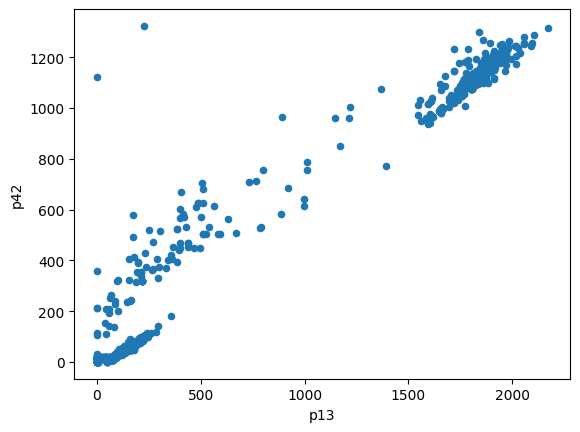

In [ ]:
#Plotting real
HC_r.plot.scatter(x='p13', y='p42', s=20)

#Low correlated features for real data

In [ ]:
plot_array = ['p1']
for i in range(len(df_r.axes[1])-1):
  y_plot = 'p' + str(i+2)
  plot_array.append(y_plot)
LC_r=df_r[plot_array]
LC_r=LC_r.head(n=1000)

In [ ]:
LC_r.loc[:,'p3']

,p3
0,2
1,1
2,1
3,1
4,2
...,...
995,2
996,2
997,4
998,4


In [ ]:
chosen_feature = 'p3'
width = len(df_r.axes[1])-1
height = len(df_r.axes[1])-1
#fig, axs = plt.subplots(width, height)

isRun = False
if isRun:
  fig, axs = plt.subplots(height, width, figsize = (250,250))
  for i in range(len(df_r.axes[1])-1):
    for j in range(i, len(df_r.axes[1])-1):
      x_plot = 'p' + str(i+1)
      y_plot = 'p' + str(j+1)
      axs[i,j].scatter(LC_r.loc[:,x_plot], LC_r.loc[:,y_plot], s=20)
      axs[i,j].set_xlabel(x_plot)
      axs[i,j].set_ylabel(y_plot)
  plt.show()


#plt.savefig()
#LC_r.plot.scatter(x='p3', y=df_r.axes[1][i], s=20)

In [ ]:
#pdf = PdfPages("Correlations.pdf")
#pdf.savefig(fig)
#pdf.close()

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


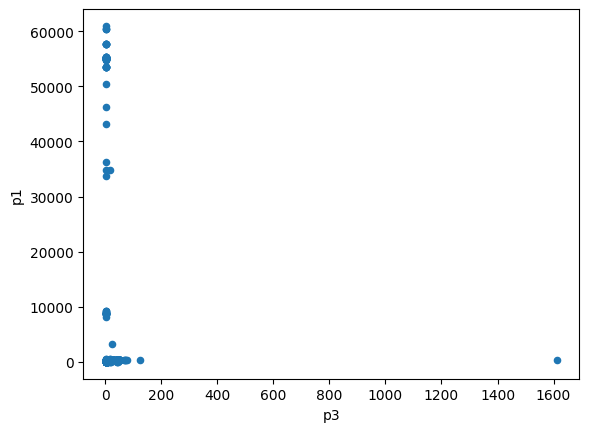

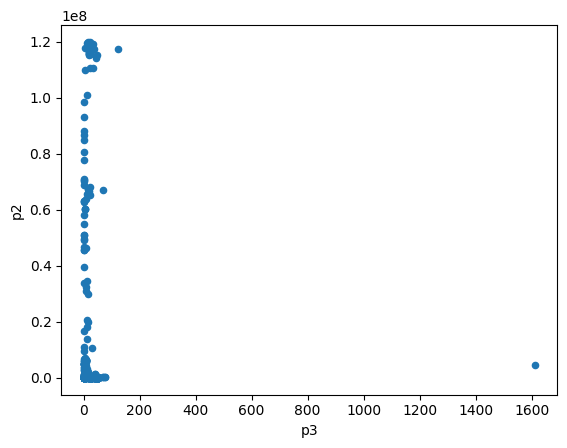

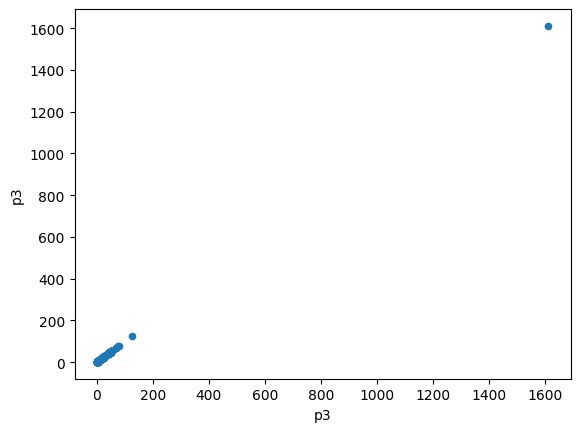

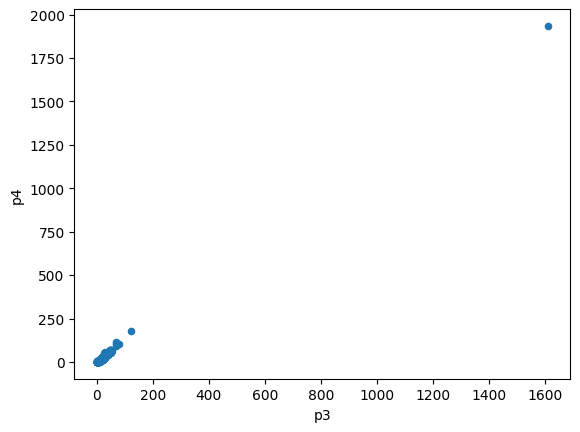

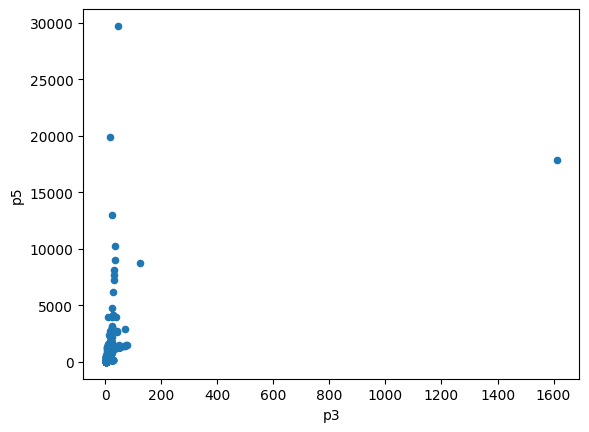

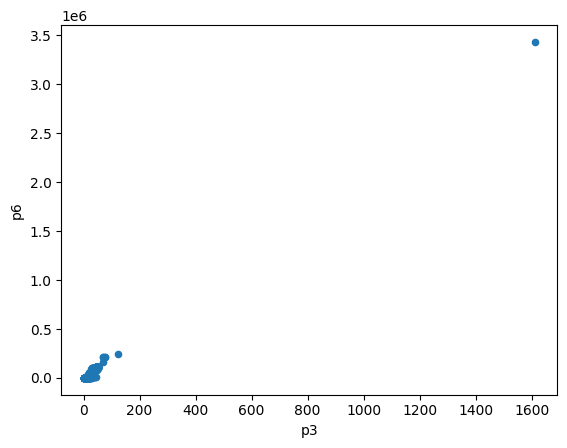

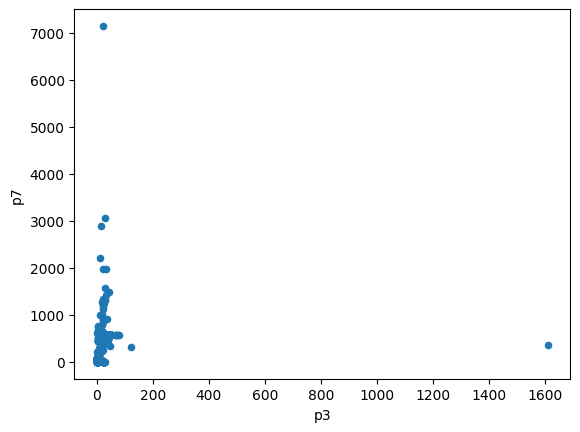

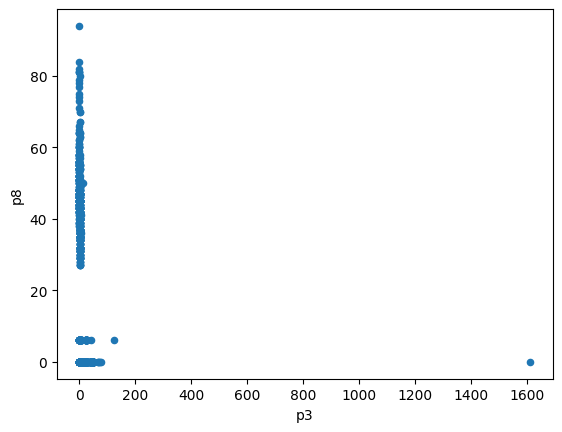

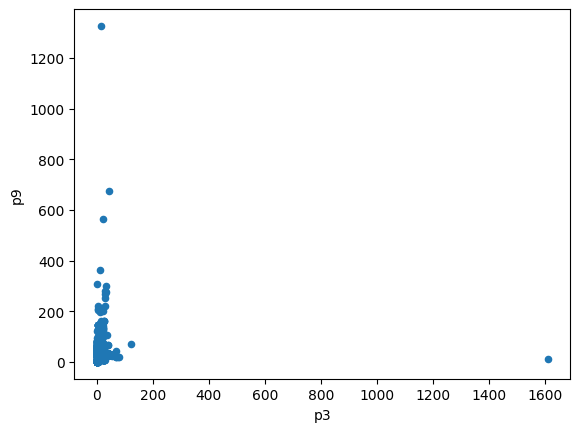

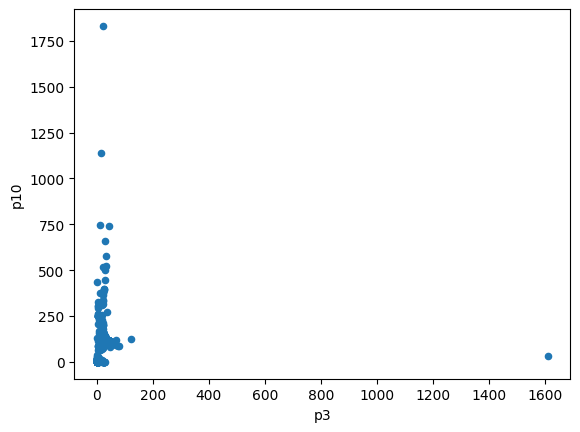

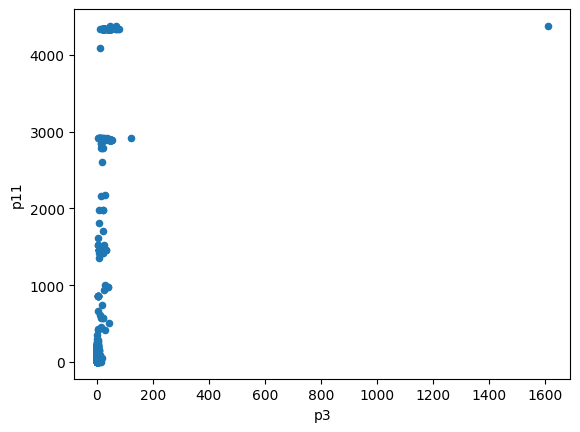

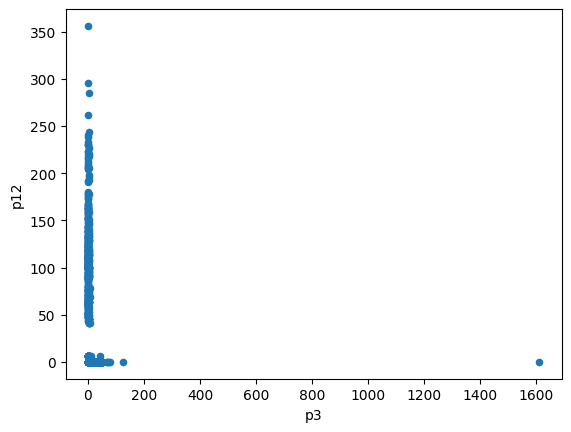

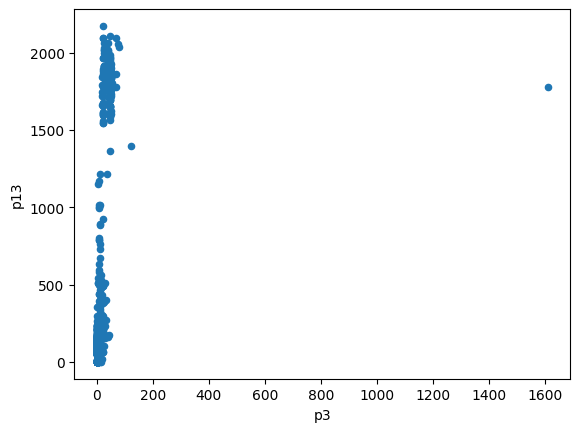

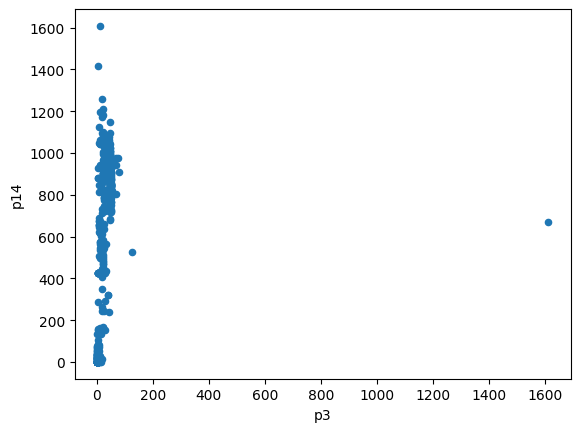

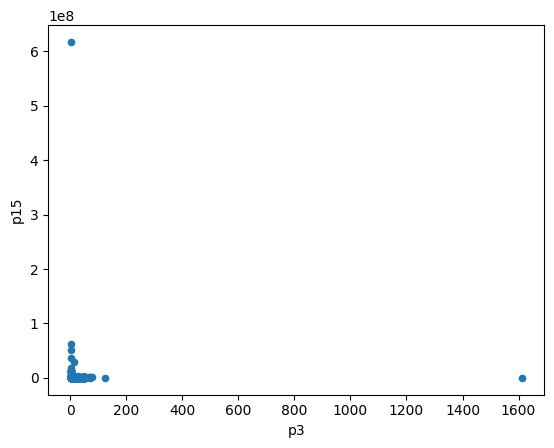

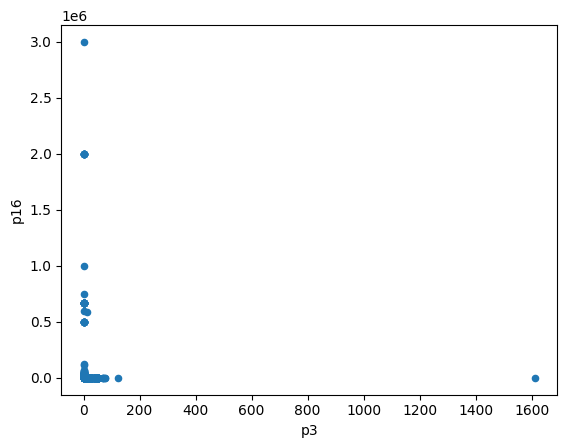

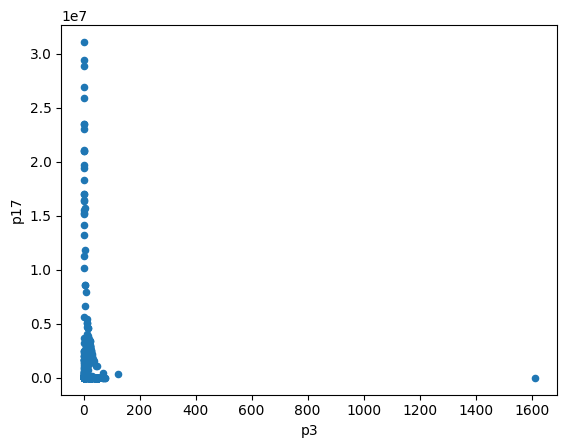

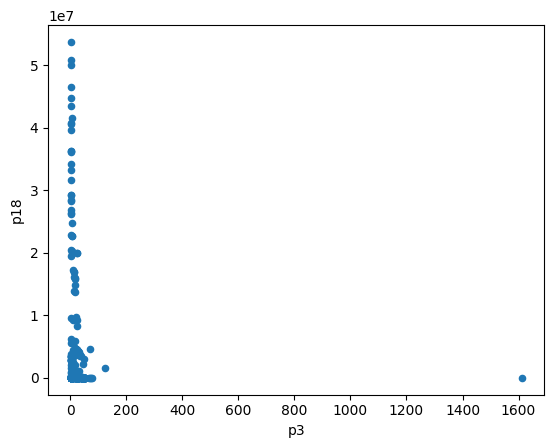

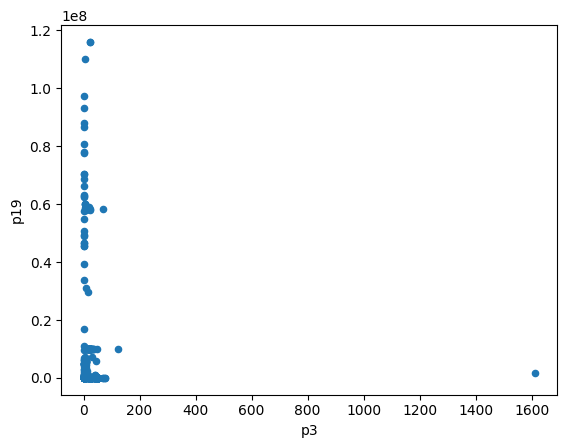

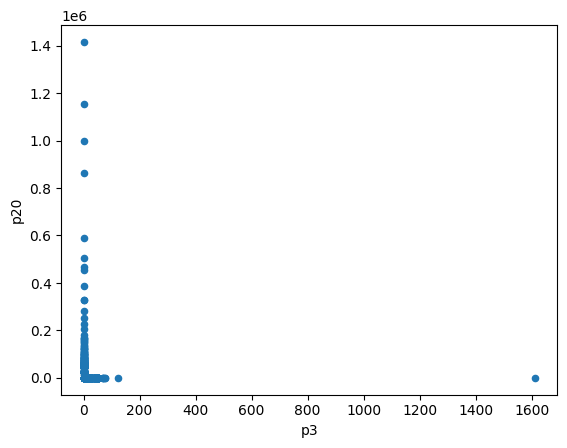

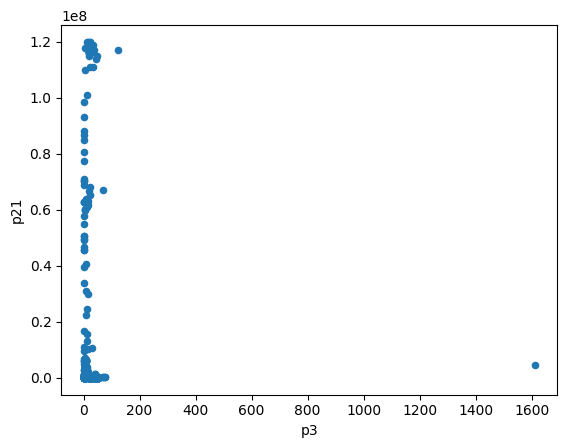

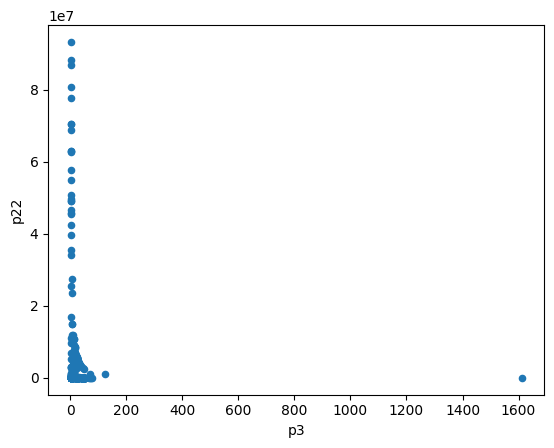

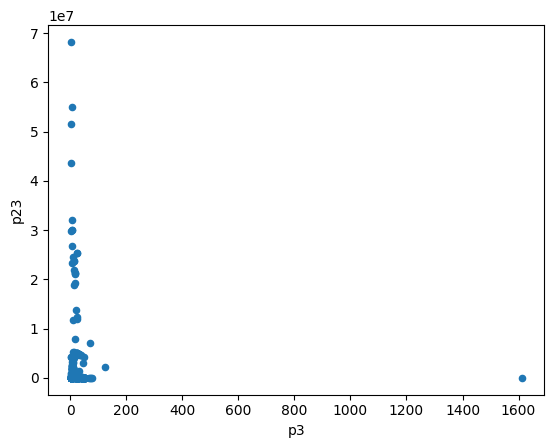

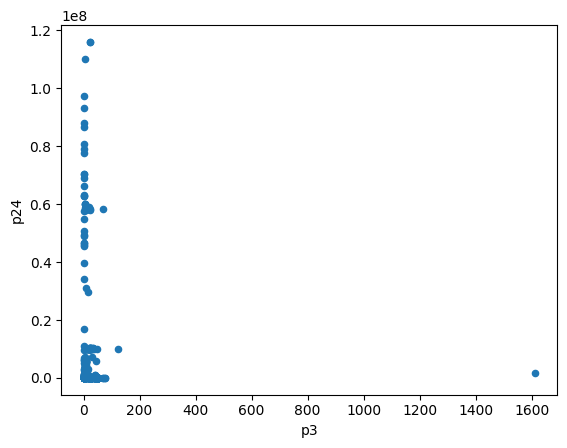

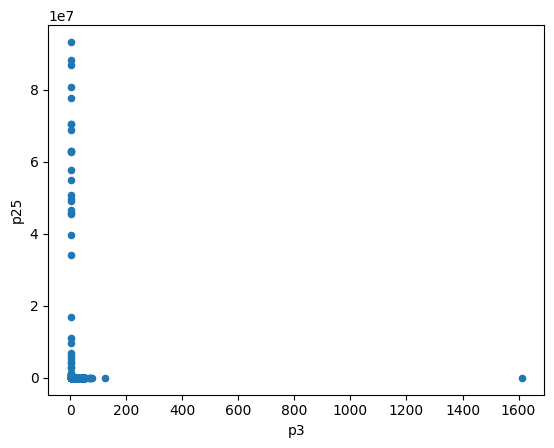

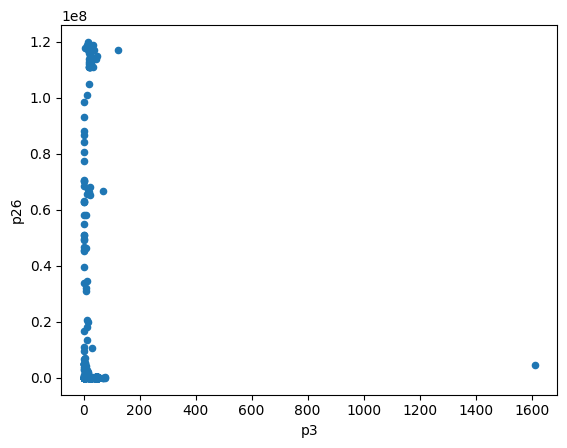

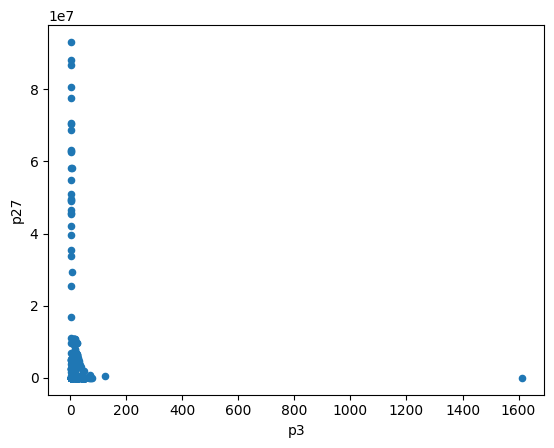

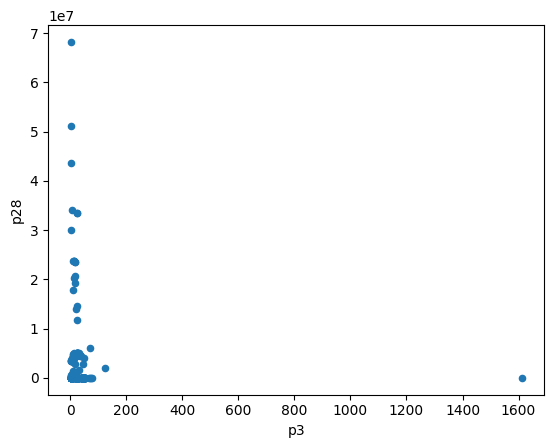

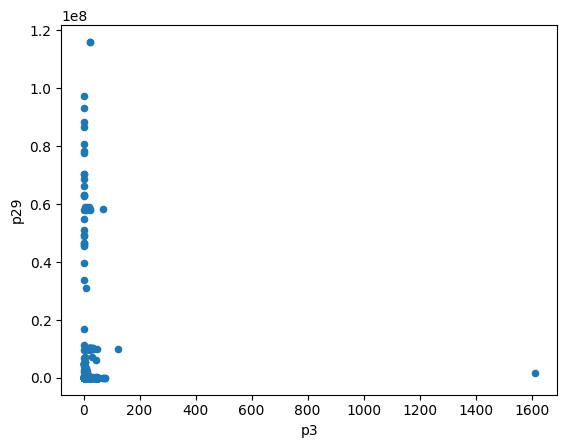

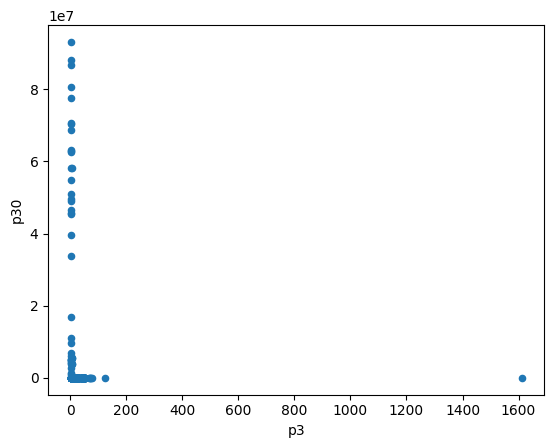

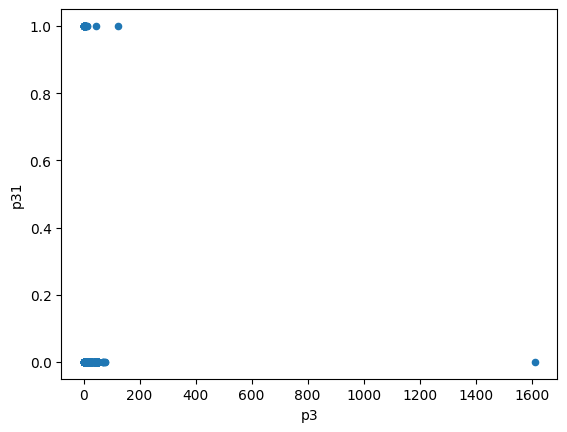

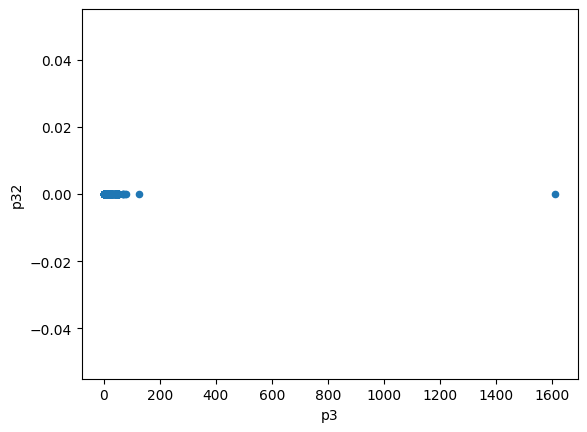

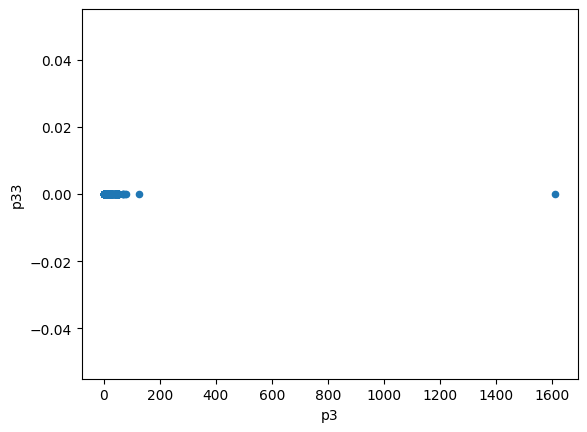

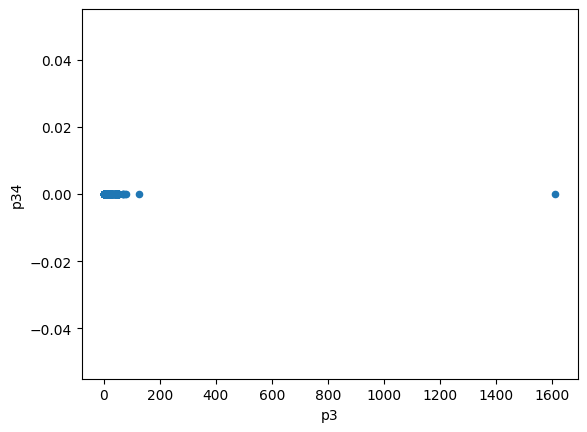

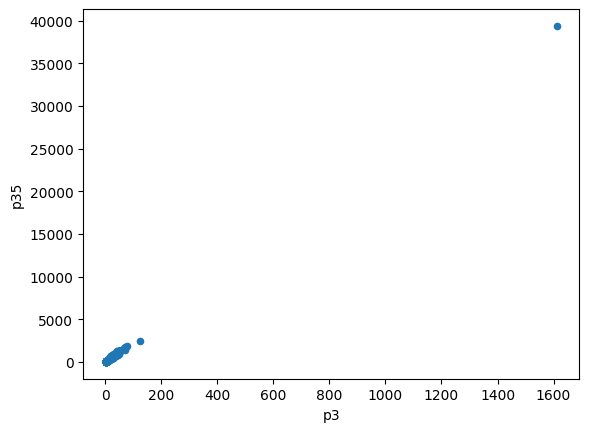

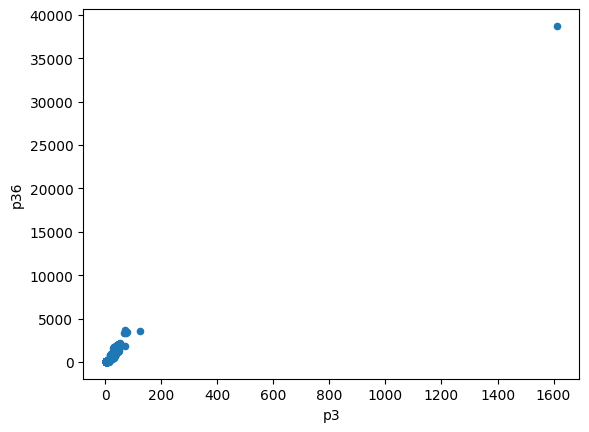

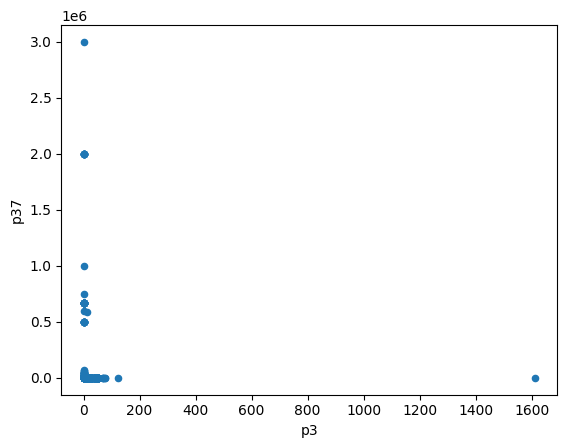

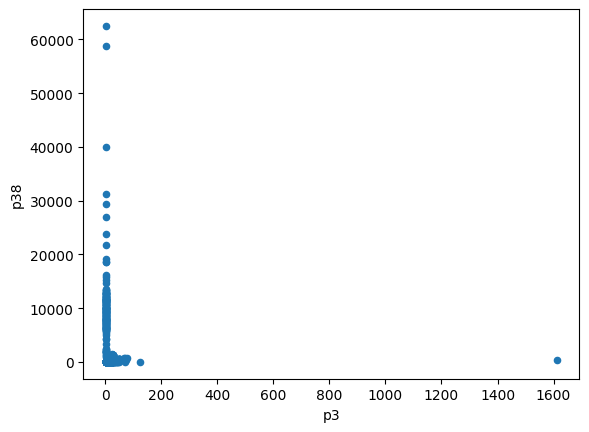

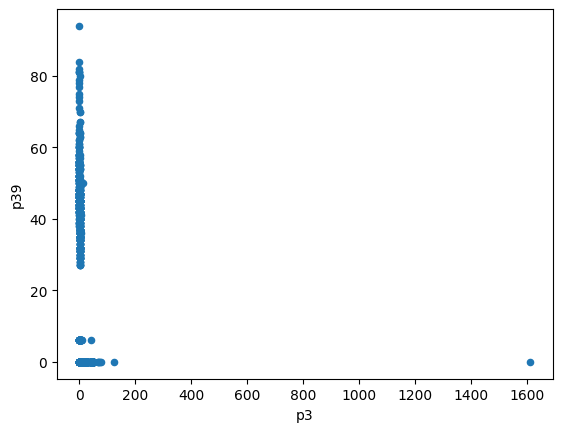

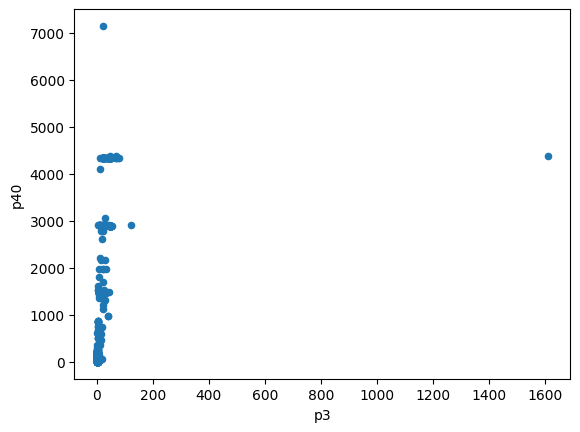

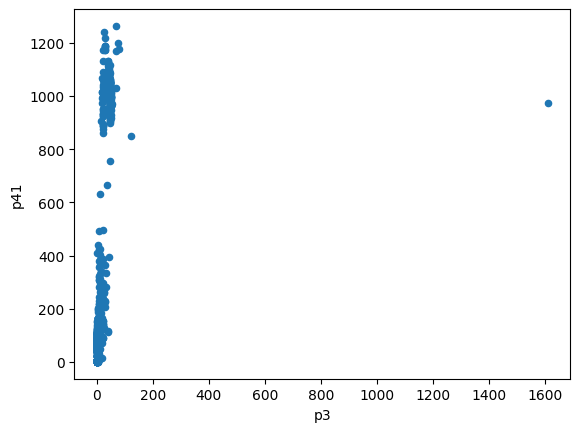

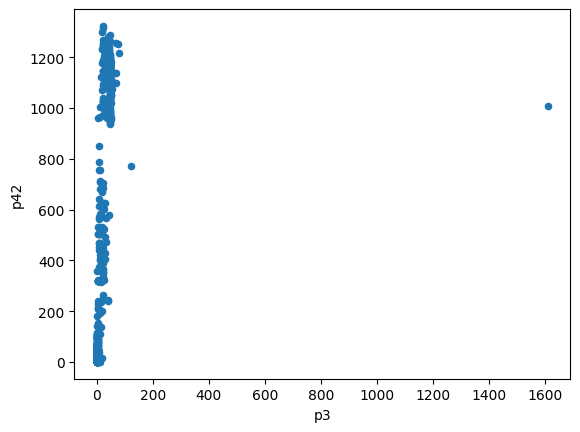

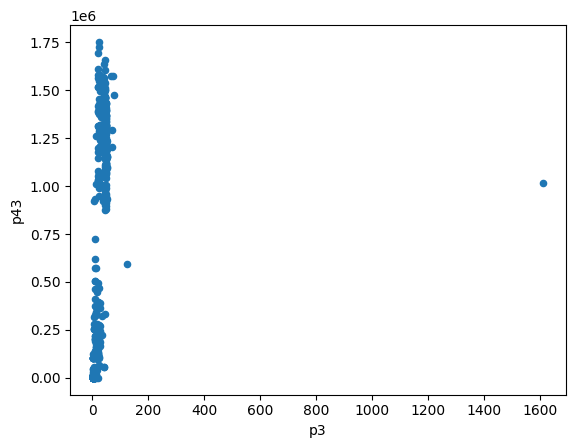

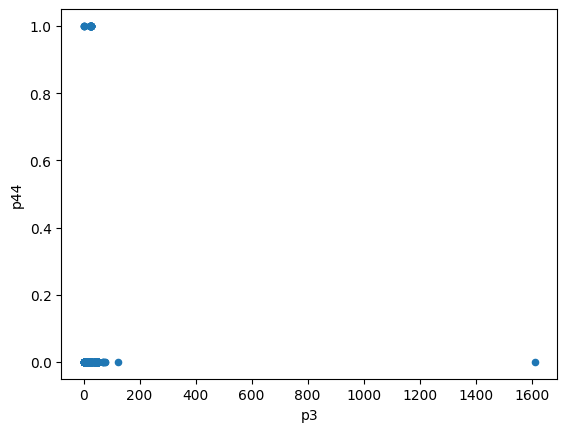

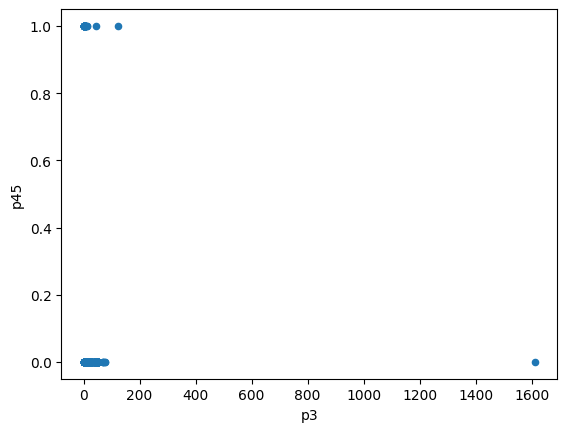

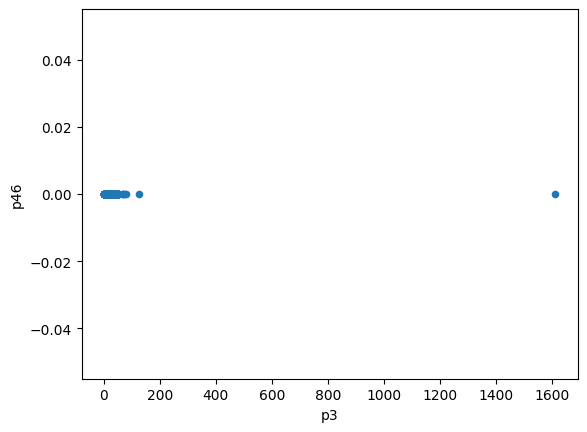

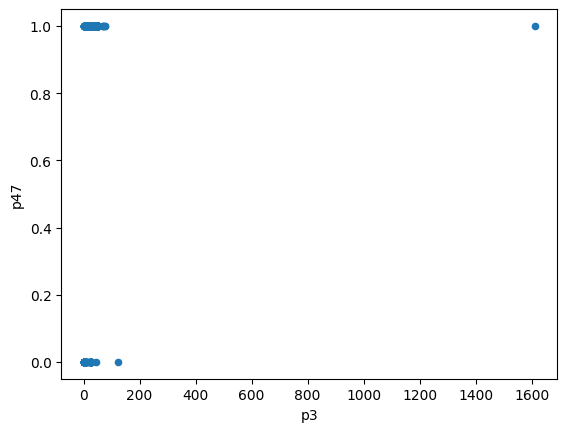

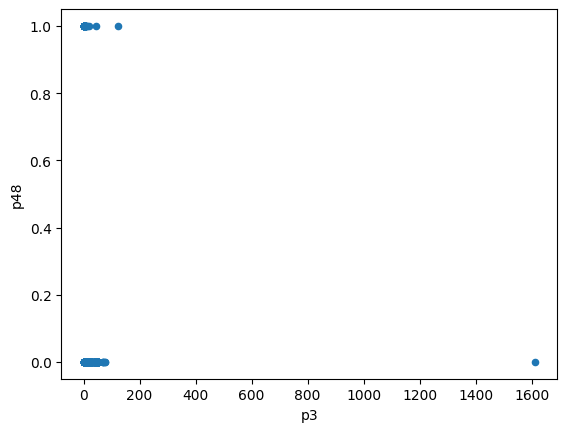

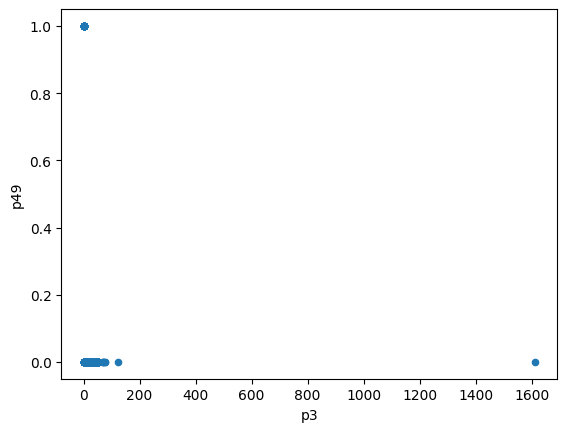

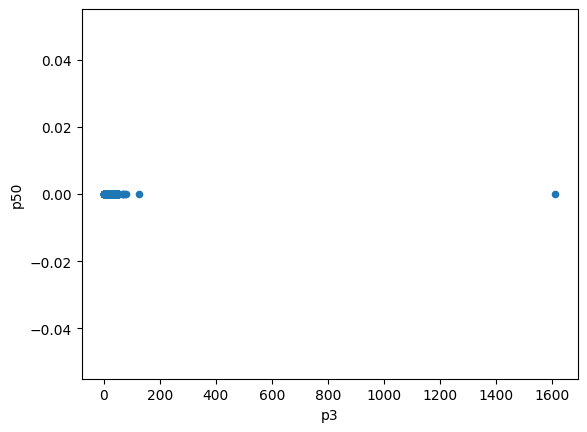

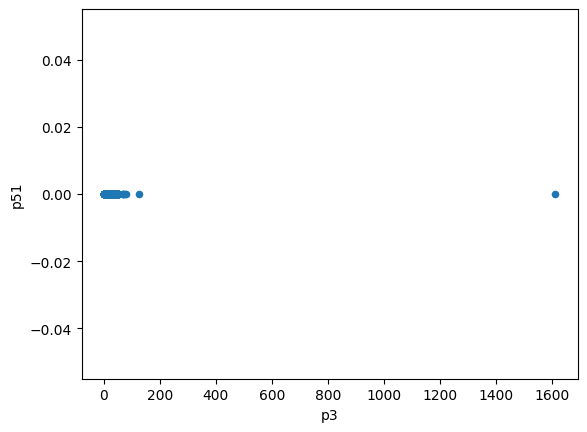

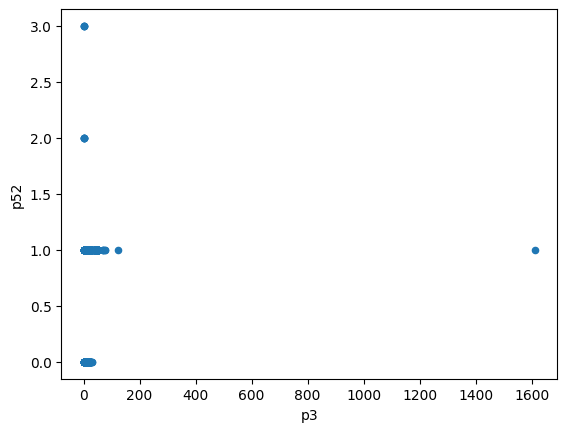

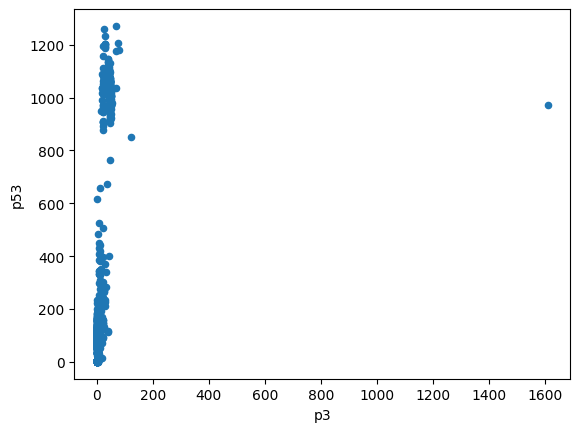

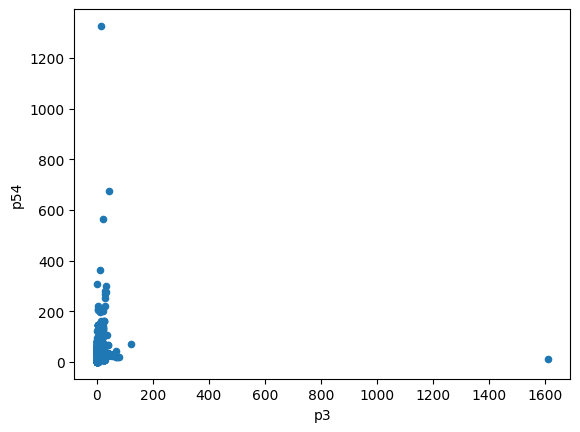

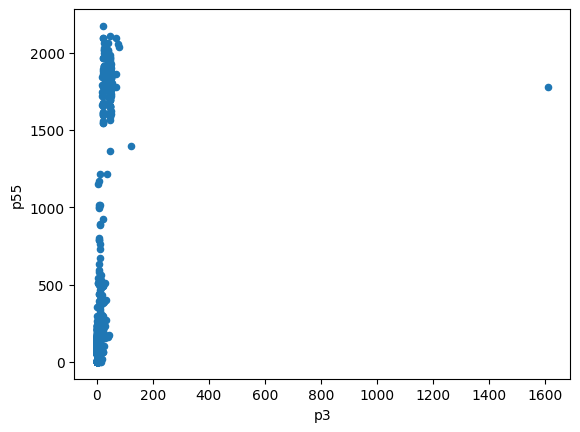

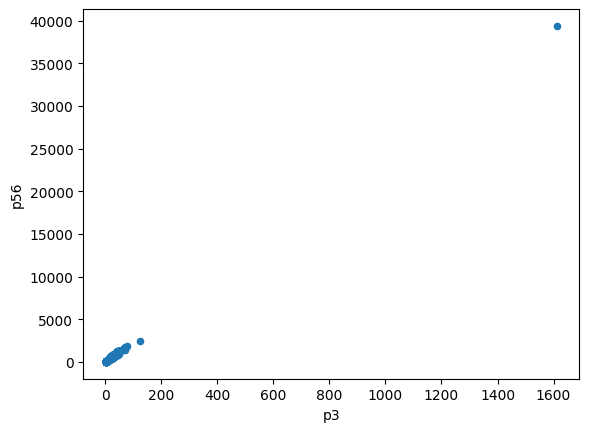

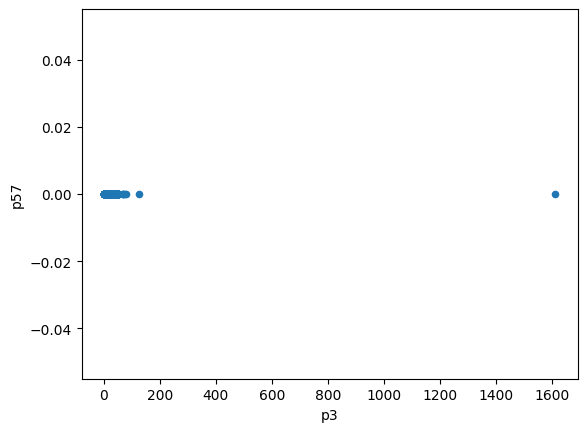

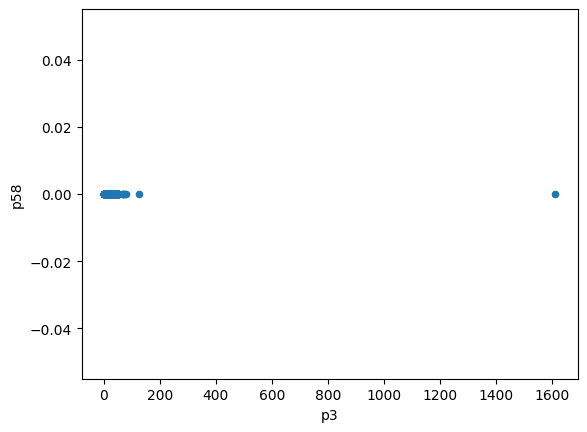

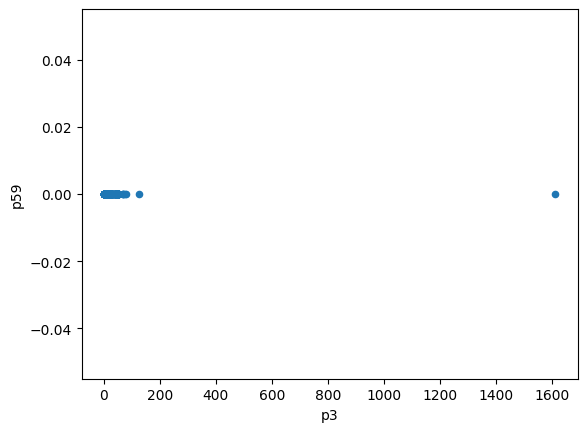

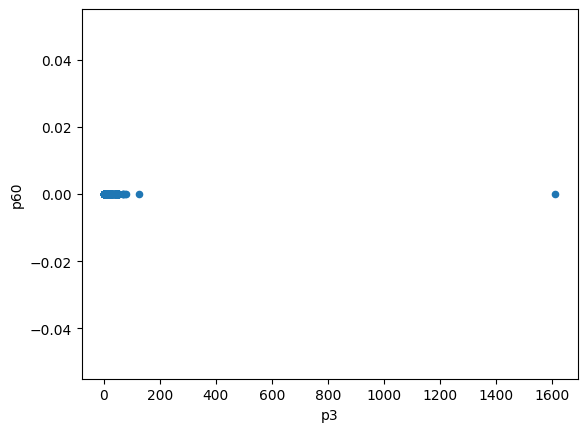

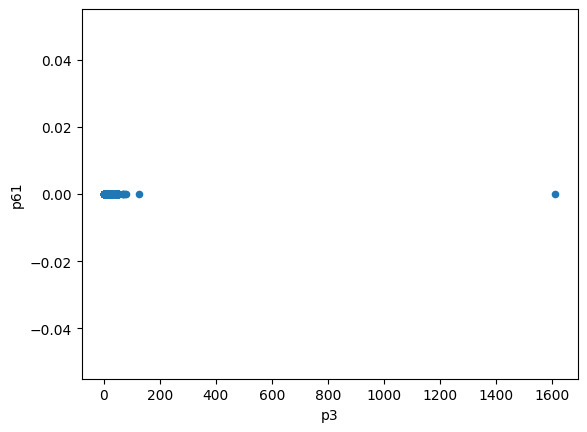

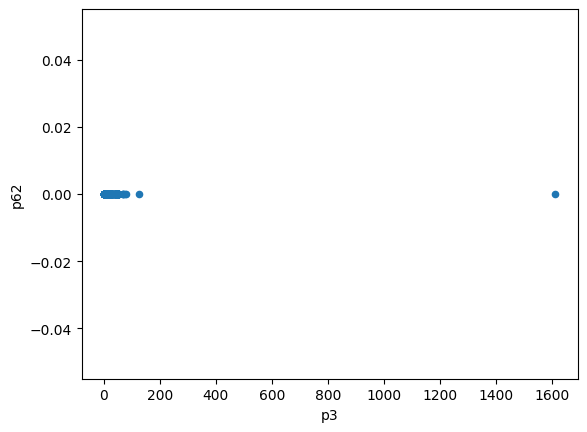

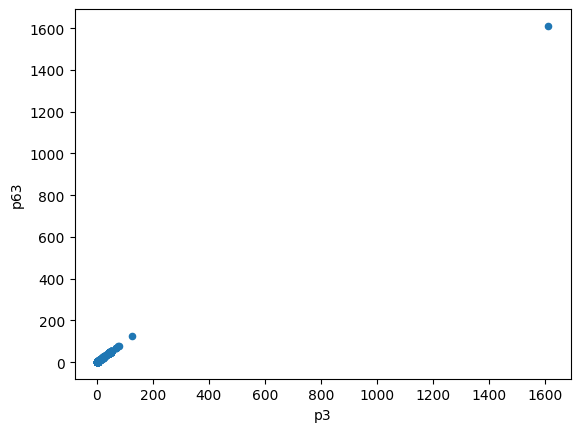

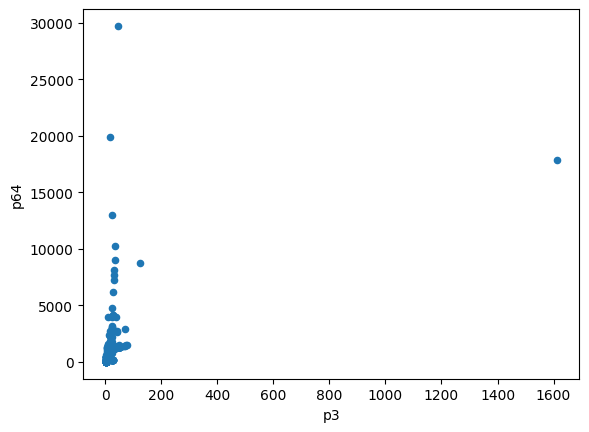

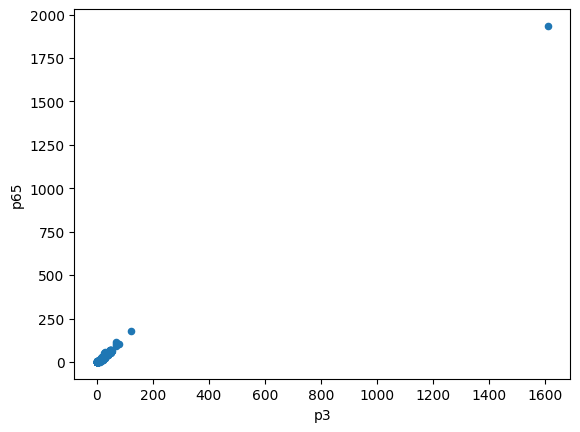

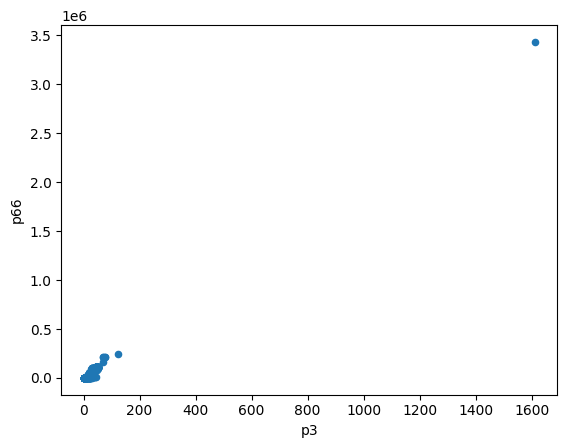

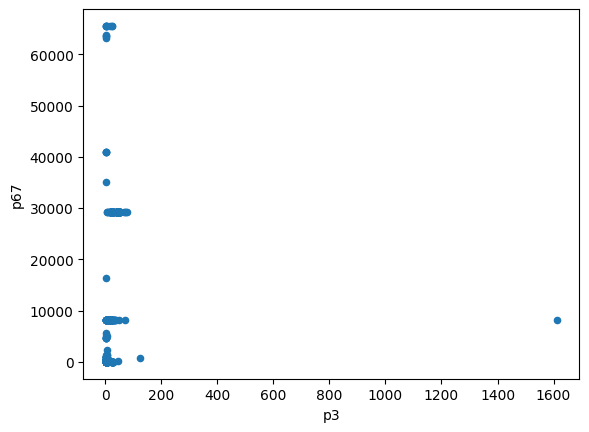

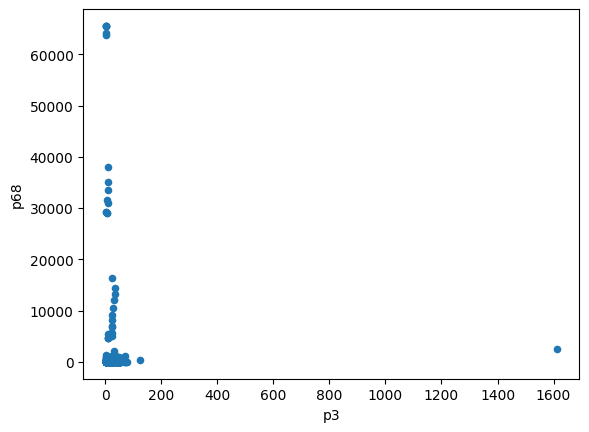

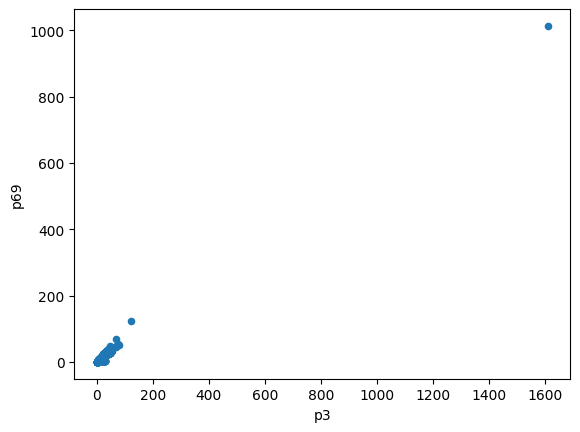

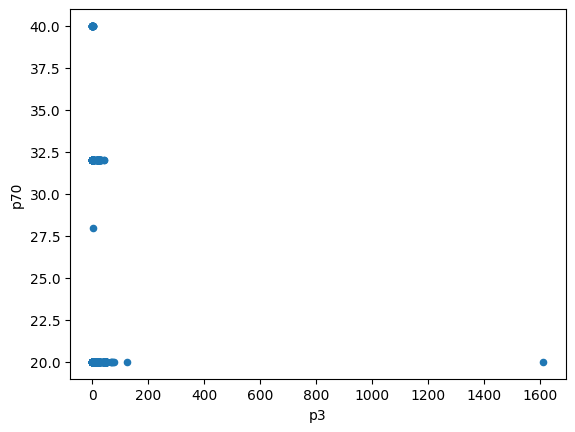

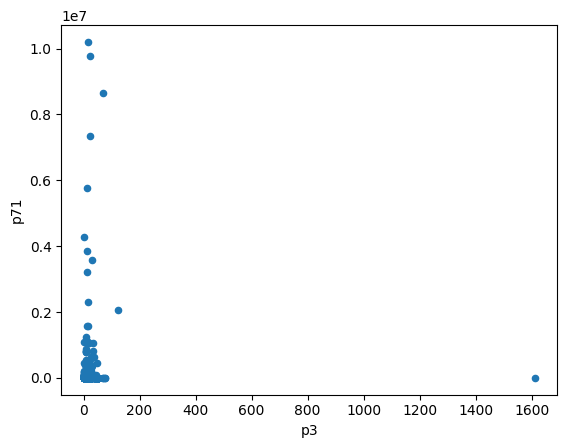

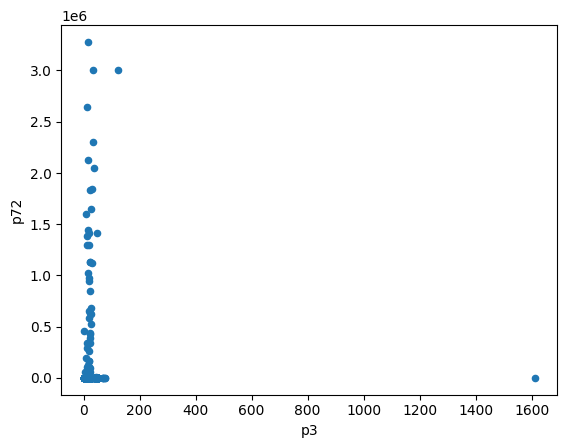

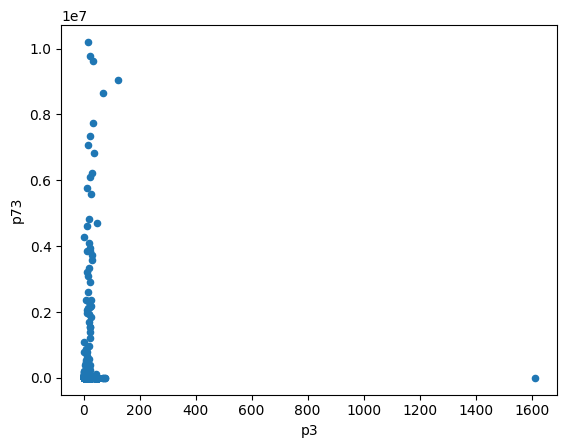

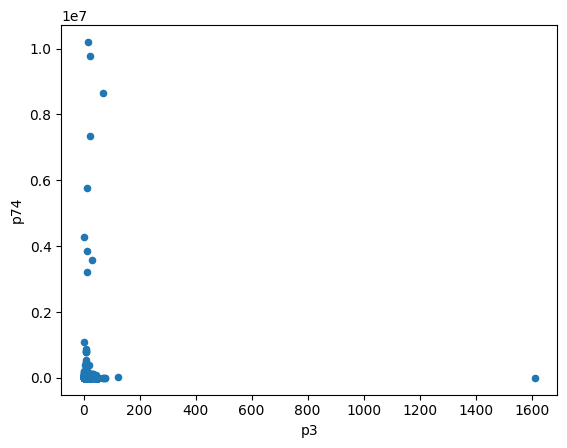

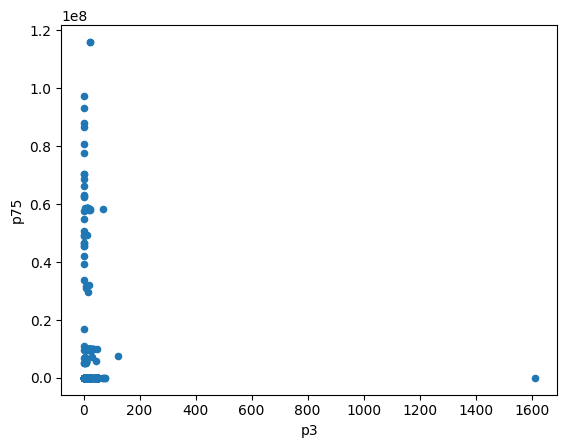

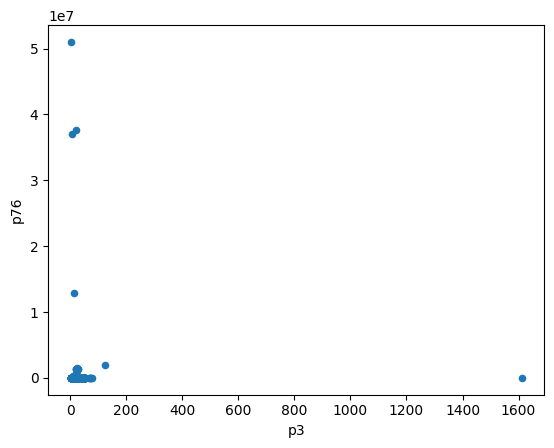

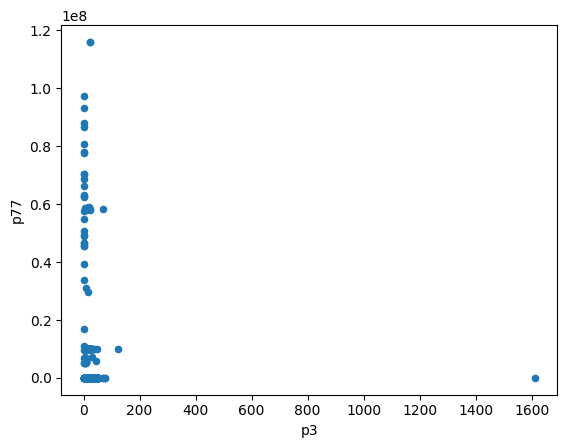

In [ ]:
chosen_feature = 'p3'
for i in range(len(df_r.axes[1])-2):
  y_plot = 'p' + str(i+1)
  LC_r.plot.scatter(x=chosen_feature, y=y_plot, s=20)

In [ ]:
print(LC_r.axes[1][14])

p15


In [ ]:
print(plot_array)
plot_array.pop(-1)
plot_array.pop(14)
print(plot_array)

['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p50', 'p51', 'p52', 'p53', 'p54', 'p55', 'p56', 'p57', 'p58', 'p59', 'p60', 'p61', 'p62', 'p63', 'p64', 'p65', 'p66', 'p67', 'p68', 'p69', 'p70', 'p71', 'p72', 'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79']
['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p50', 'p51', 'p52', 'p53', 'p54', 'p55', 'p56', 'p57', 'p58', 'p59', 'p60', 'p61', 'p62', 'p63', 'p64', 'p65', 'p66', 'p67', '

In [ ]:
#Standarizing low correlated features for real data

LC_r = df_r[['p11','p42']]
LC_r = LC_r.head(1000)
scaler.fit(LC_r)
LC_r_array=scaler.transform(LC_r)
LC_r_array.shape

(1000, 2)

In [ ]:
#Negatively correlated features for real data
NC_r=df_r[['p12', 'p39']]
NC_r=NC_r.head(1000)

In [ ]:
#Standarizing negatively correlated features for real data
scaler.fit(NC_r)
NC_r_array=scaler.transform(NC_r)
NC_r_array.shape

(1000, 2)

<Axes: xlabel='p12', ylabel='p39'>

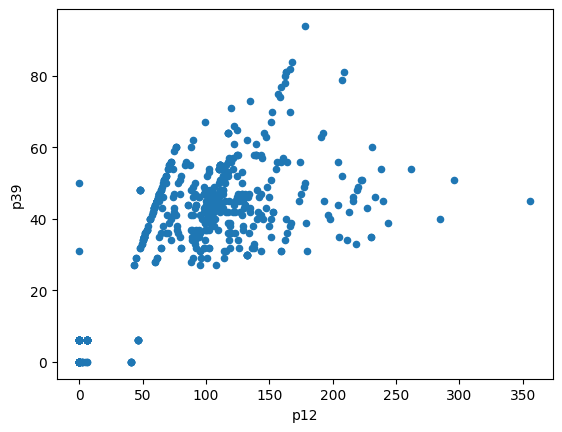

In [ ]:
NC_r.plot.scatter(x='p12', y='p39', s=20)

#Import synthetic dataset for analysis <br>


In [ ]:
#Importing synthetic data
df_s=pd.read_csv('/content/drive/MyDrive/Dataset/synGANFriday-WorkingHours-Afternoon-DDos.csv')
#df_s=df_s.drop(['Unnamed: 0'], axis=1)
df_s.head(3)

,Unnamed: 0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p69,p70,p71,p72,p73,p74,p75,p76,p77,p78
0,0,9175,60198,7,59,603,364,66,52,48.000000,...,1,20,11623.859307,2781.515359,3591908,13511,-5.899639e+05,80010.811179,-645299,382659
1,1,53527,49777,39,32,4013,6634,70,45,54.000000,...,27,32,8254.842294,-1335.537267,6824841,515419,-4.547558e+05,70201.477577,36482745,10691937
2,2,55063,4722112,49,13,3135,296,846,32,33.051282,...,0,32,-3414.609155,293753.645290,6105004,16240,6.291771e+06,80336.497140,-541359,435314


In [ ]:
#col=df.columns
#scaler.fit(df)
#arr=scaler.transform(df)
#df1=pd.DataFrame(arr)
#df1.columns=col

In [ ]:
# # df1=df1.abs()
# df1.head(3)

In [ ]:
# corr1=df.corr()

In [ ]:
# sns.set(rc={'figure.figsize':(10,8)})
# sns.heatmap(corr1, cmap='YlGnBu', annot=True)

In [ ]:
df_temp_s = df_show_r.drop(['p15'], axis = 1)
df_temp_s = df_temp_s.drop(['p16'], axis = 1)
df_temp_s = df_temp_s.drop(['p49'], axis = 1)
df_temp_s = df_temp_s.drop(['p79'], axis = 1)
df_temp_s.axes[1]

Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11',
       'p12', 'p13', 'p14', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23',
       'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33',
       'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p40', 'p41', 'p42', 'p43',
       'p44', 'p45', 'p46', 'p47', 'p48', 'p50', 'p51', 'p52', 'p53', 'p54',
       'p55', 'p56', 'p57', 'p58', 'p59', 'p60', 'p61', 'p62', 'p63', 'p64',
       'p65', 'p66', 'p67', 'p68', 'p69', 'p70', 'p71', 'p72', 'p73', 'p74',
       'p75', 'p76', 'p77', 'p78'],
      dtype='object')

In [ ]:
#df_show_s = df_s
#df_show_s.columns = df_temp_s.axes[1]

In [ ]:
df_show_s.axes[1][42]

'p44'

In [ ]:
df_show_s.axes[1][12]

'p12'

In [ ]:
#HC_show_s=df_show_s[[' Packet Length Variance',' Bwd Packet Length Mean' ]]
#HC_show_s=HC_show_s.head(n=1000)

In [ ]:
##Standarizing synth data
scaler.fit(HC_show_s)
HC_show_s_array=scaler.transform(HC_show_s)
HC_show_s_array.shape

NameError: name 'HC_show_s' is not defined

In [ ]:
#Plotting synth
HC_show_s.plot.scatter(x=' Bwd Packet Length Mean', y=' Packet Length Variance', s=20)

In [ ]:
df_show_r.axes[1][41]

In [ ]:
df_show_r.axes[1][10]

In [ ]:
#Standarizing low correlated features for real data

LC_show_r = df_show_r[['Bwd Packet Length Max',' Packet Length Std']]
LC_show_r = LC_show_r.head(1000)
scaler.fit(LC_show_r)
LC_show_r_array=scaler.transform(LC_show_r)
LC_show_r_array.shape

In [ ]:
#Plotting real
LC_show_r.plot.scatter(x='Bwd Packet Length Max', y=' Packet Length Std', s=20)

In [ ]:
#Higly correlated features for synthetic data
HC_s=df_s[['p13','p42' ]]
HC_s=HC_s.head(n=1000)

<Axes: xlabel='p13', ylabel='p42'>

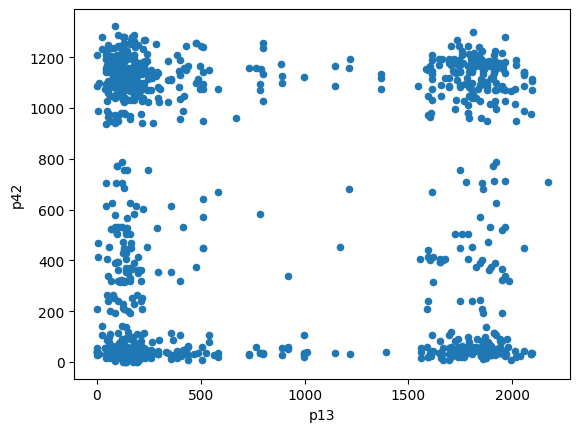

In [ ]:
#Plotting HC_s
HC_s.plot.scatter(x='p13', y='p42', s=20)

In [ ]:
#Standarizing synthetic data
scaler.fit(HC_s)
HC_s_array=scaler.transform(HC_s)
HC_s_array.shape

(1000, 2)

In [ ]:
# col=HC_s.columns
# HC_s_arr_df=pd.DataFrame(HC_s_array, columns=col)
# HC_s_arr_df.plot.scatter(x='fixed acidity', y='citric acid', s=20)

In [ ]:
# corr_hcr=HC_r.corr()
# sns.set(rc={'figure.figsize':(10,8)})
# sns.heatmap(corr_hcr, cmap='YlGnBu', annot=True)

In [ ]:
#HC.plot.scatter(x='fixed acidity', y='citric acid', s=50)

In [ ]:
#Low correlated features for Synthetic data
LC_s=df_s[['p11','p42' ]]
LC_s=LC_s.head(n=1000)

<Axes: xlabel='p11', ylabel='p42'>

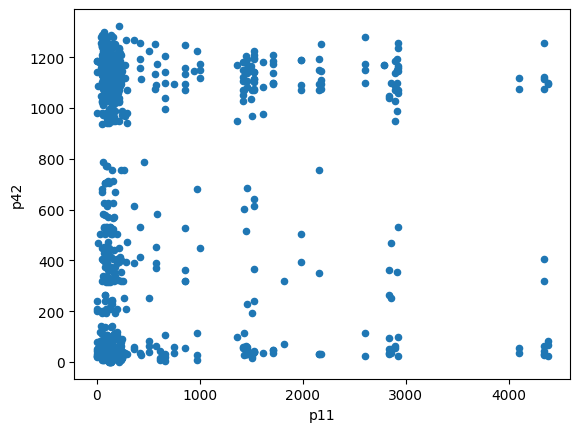

In [ ]:
LC_s.plot.scatter(x='p11', y='p42', s=20)

In [ ]:
#Standarizing low correlated features for synthetic data
scaler.fit(LC_s)
LC_s_array=scaler.transform(LC_s)
LC_s_array.shape

(1000, 2)

In [ ]:
#LC.plot.scatter(x='citric acid', y='total sulfur dioxide', s=10)

In [ ]:
#Negatively correlated features for Synthetic data
NC_s=df_s[['p12', 'p39']]
NC_s=NC_s.head(1000)

<Axes: xlabel='p12', ylabel='p39'>

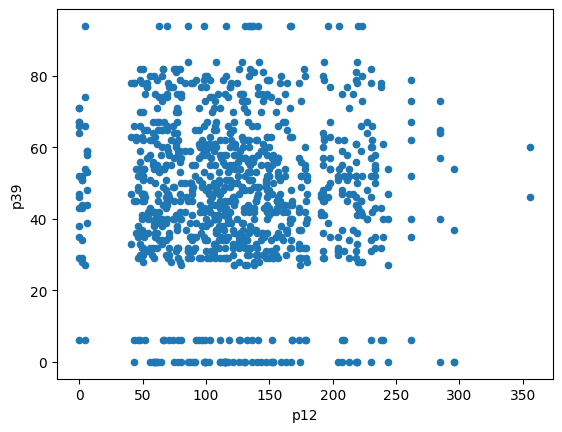

In [ ]:
NC_s.plot.scatter(x='p12', y='p39', s=20)

In [ ]:
#Standarizing negatively correlated features for synthetic data
scaler.fit(NC_s)
NC_s_array=scaler.transform(NC_s)
NC_s_array.shape

(1000, 2)

In [ ]:
#NC.plot.scatter(x='fixed acidity', y='pH', s=10)

#Persistent diagramm

In [ ]:
#pip install -U giotto-tda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.6/460.6 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import pandas as pd
import numpy as np
#import gudhi as gd
from gtda.diagrams import PersistenceEntropy
from gtda.homology import VietorisRipsPersistence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from gtda.diagrams import Scaler
from gtda.plotting import plot_diagram
from gtda.diagrams import PairwiseDistance as pdDist
#from gudhi.wasserstein import wasserstein_distance as wd

In [ ]:
def DataReshape(data):
    d=data
    d=d.reshape(1, 1000, 2)
    return d


In [ ]:
#Generate Persistent Diagram from the datasets (Origial data and Synthetic data)
def PerDgm(OrgData, SynData):
    odata=OrgData
    sdata=SynData
    scaler1 = Scaler()

#     od_re = odata.reshape(1,300,3)
#     sd_re = sdata.reshape(1,550,2)

    od_re= DataReshape(odata) #Converting 2D array --> 3D array (Original Data)
    sd_re= DataReshape(sdata) #Converting 2D array --> 3D array (Synthetic Data)

    VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Declaring Vietoris-Rips Complex

    od_dgm= VR.fit_transform(od_re) # Computing Persistent Diagram for Original Data
    sd_dgm= VR.fit_transform(sd_re) # Computing Persistent Diagram for Synthetic Data

    od_dgm1 = scaler1.fit_transform(od_dgm) # Sclaing the persitent diagram
    sd_dgm1 = scaler1.fit_transform(sd_dgm)  # Sclaing the persitent diagram

    return od_dgm1, sd_dgm1

In [ ]:
arr=[]# Persistent diagram for Highly correlated features

arr=PerDgm(HC_s_array,HC_r_array)

In [ ]:
d1=arr[0]#Persistent diagram for synthetic data
d2=arr[1]#Persistent diagram for original data

In [ ]:
d1

array([[[0.00000000e+00, 6.05242694e-04, 0.00000000e+00],
        [0.00000000e+00, 1.21349486e-03, 0.00000000e+00],
        [0.00000000e+00, 1.25922830e-03, 0.00000000e+00],
        ...,
        [2.93337291e-02, 3.05080498e-02, 1.00000000e+00],
        [3.11192430e+00, 3.14039309e+00, 2.00000000e+00],
        [2.62070612e-01, 2.63826355e-01, 2.00000000e+00]]])

In [ ]:
np.savetxt("SRU-HC-Syn.txt", d1[0], delimiter =", ")

In [ ]:
np.savetxt("SRU-HC-Real.txt", d2[0], delimiter =", ")

In [ ]:
plot_diagram(d1[0])

In [ ]:
plot_diagram(d2[0])

In [ ]:
# p=1--> Absolute difference between two persistent diagram
# p=2--> Euclidean difference between two persistent diagram

In [ ]:
dist = pdDist(metric = 'wasserstein',order=None,metric_params={'delta':0.01, 'p':2.})
dwgi = dist.fit(X=d1)
dwgi1 = dwgi.transform(d2)
print(f"Giotto wass: {dwgi1}")

Giotto wass: [[[2.77694465 1.21772696 0.01426144]]]


In [ ]:
LC_s_array

array([[ 1.367056  ,  1.04267728],
       [-0.45165897,  1.06202219],
       [-0.52244386, -1.08749713],
       ...,
       [-0.57381998, -1.13035034],
       [-0.32949795,  0.94771107],
       [-0.49390156,  0.96222933]])

In [ ]:
LC_r_array

array([[-0.74027318, -0.77011361],
       [-0.73680375, -0.77011361],
       [-0.73680375, -0.77011361],
       ...,
       [-0.70326591, -0.74202227],
       [-0.62173427, -0.59955905],
       [-0.68013637, -0.6991656 ]])

In [ ]:
arr1=[]# Persistent diagram for Low correlated features

arr1=PerDgm(LC_s_array,LC_r_array)

In [ ]:
d1_LC=arr1[0]#Persistent diagram for synthetic data
d2_LC=arr1[1]#Persistent diagram for original data

In [ ]:
np.savetxt("SRU-LC-Syn.txt", d1_LC[0], delimiter =", ")
np.savetxt("SRU-LC-Real.txt", d2_LC[0], delimiter =", ")

In [ ]:
plot_diagram(d1_LC[0])

In [ ]:
plot_diagram(d2_LC[0])

In [ ]:
dist_LC = pdDist(metric = 'wasserstein',order=None,metric_params={'delta':0.01, 'p':2.})
dwgi_LC = dist_LC.fit(X=d1_LC)
dwgi1_LC = dwgi_LC.transform(d2_LC)
print(f"Giotto wass: {dwgi1_LC}")

Giotto wass: [[[1.21886138e+00 4.49210604e-01 5.23623142e-04]]]


In [ ]:
arr2=[]# Persistent diagram for Negative correlated features

arr2=PerDgm(NC_s_array,NC_r_array)

In [ ]:
d1_NC=arr2[0]#Persistent diagram for synthetic data
d2_NC=arr2[1]#Persistent diagram for original data

In [ ]:
np.savetxt("SRU-NC-Syn.txt", d1_NC[0], delimiter =", ")
np.savetxt("SRU-NC-Real.txt", d2_NC[0], delimiter =", ")

In [ ]:
plot_diagram(d1_NC[0])

In [ ]:
plot_diagram(d2_NC[0])

In [ ]:
dist_NC = pdDist(metric = 'wasserstein',order=None,metric_params={'delta':0.01, 'p':2.})
dwgi_NC = dist_NC.fit(X=d1_NC)
dwgi1_NC = dwgi_NC.transform(d2_NC)
print(f"Giotto wass: {dwgi1_NC}")

Giotto wass: [[[1.95710815 0.66851671 0.0030505 ]]]


#Plotting

In [ ]:
df_show_r = df_r

In [ ]:
df_show_r.axes[1][42]

' Packet Length Variance'

In [ ]:
df_show_r.axes[1][12]

' Bwd Packet Length Mean'

In [ ]:
df_show_r.axes[1][39]

' Max Packet Length'

In [ ]:
df_show_r.axes[1][11]

' Bwd Packet Length Min'

In [ ]:
HC_show_r=df_show_r[[' Packet Length Variance',' Bwd Packet Length Mean' ]]
HC_show_r=HC_show_r.head(n=1000)

In [ ]:
##Standarizing real data
scaler.fit(HC_show_r) #Real
HC_show_r_array=scaler.transform(HC_show_r)
HC_show_r_array.shape #Real

(1000, 2)

<Axes: xlabel=' Bwd Packet Length Mean', ylabel=' Packet Length Variance'>

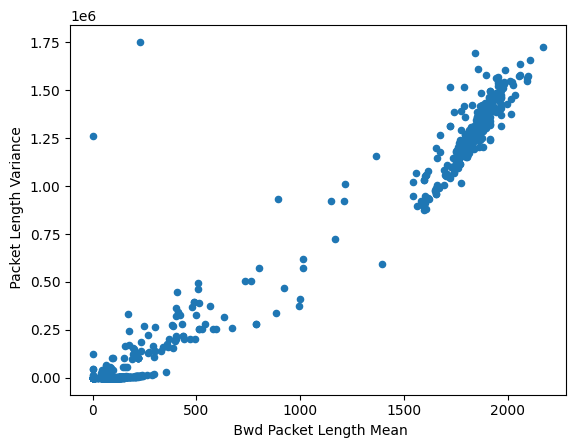

In [ ]:
#Plotting real
HC_show_r.plot.scatter(x=' Bwd Packet Length Mean', y=' Packet Length Variance', s=20)

In [ ]:
df_show_r.axes[1][41]

' Packet Length Std'

In [ ]:
df_show_r.axes[1][10]

'Bwd Packet Length Max'

In [ ]:
#Standarizing low correlated features for real data

LC_show_r = df_show_r[['Bwd Packet Length Max',' Packet Length Std']]
LC_show_r = LC_show_r.head(1000)
scaler.fit(LC_show_r)
LC_show_r_array=scaler.transform(LC_show_r)
LC_show_r_array.shape

(1000, 2)

<Axes: xlabel='Bwd Packet Length Max', ylabel=' Packet Length Std'>

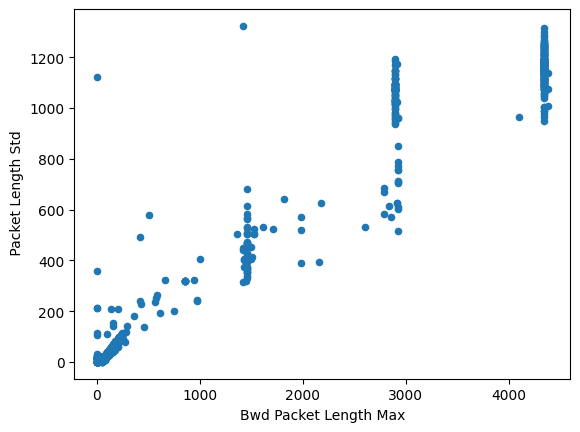

In [ ]:
#Plotting real
LC_show_r.plot.scatter(x='Bwd Packet Length Max', y=' Packet Length Std', s=20)